In [34]:
import numpy as np
np.random.seed(42) # for reproducibility
from keras.datasets import mnist
from keras.utils import to_categorical
import pylab as plt
import matplotlib.cm as cm

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# What does the data look like?
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


label :  8


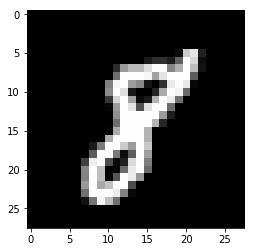

In [35]:
# x_train is 60,000 images, so let's look at one of the images
i = np.where(y_train==8)[0][0]
print("label : ", y_train[i])
sample = x_train[i, ...]
sample.shape
plt.imshow(sample, cmap=cm.gray)
plt.show()

In [36]:
# the data should be in a flat array for each sample, so we will reshape from 28 * 28 to 784
x_train = x_train.reshape(60000,28*28)
print(x_train.shape)

# We will one-hot encode the labels
y_train = to_categorical(y_train)

(60000, 784)


In [37]:
print(y_train.shape)
print("label : ", y_train[i, :])

(60000, 10)
label :  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [38]:
# ok now let's get a cross-validation set from the training data.
from sklearn.model_selection import train_test_split
x_train_part, x_train_val, y_train_part, y_train_val = \
    train_test_split(x_train, y_train, test_size=0.2, random_state=42, stratify=np.argmax(y_train, axis=1))

In [ ]:
# Before creating the model, we will use a custom initializer.

In [126]:
# now we will define the logistic regression classification model.
from keras import models
from keras import layers
from keras import optimizers
from keras import initializers



model1 = models.Sequential()
model1.add(layers.Dense(16, activation='relu'
                        #, kernel_initializer=initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=42)
                        #, bias_initializer='zeros'
                        , input_shape=(784,)))
model1.add(layers.Dense(10, activation='softmax'))

#compile the model
model1.compile(optimizer="rmsprop",
    #optimizer=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [127]:
# now fit the model...
eps = 100
history = model1.fit(x_train_part,
                    y_train_part,
                    batch_size=128,
                    epochs=eps,
                    verbose=0,
                    validation_data=(x_train_val, y_train_val))

print("training accuracy: {}".format(history.history['acc'][-1]))
print("validation accuracy: {}".format(history.history['val_acc'][-1]))

training accuracy: 0.9471458333333334
validation accuracy: 0.9213333331743876


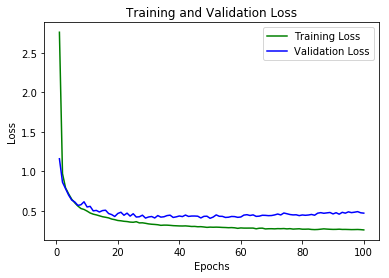

In [128]:
# plot the learning parameters
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, eps + 1)

plt.plot(epochs, loss_values, 'g', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

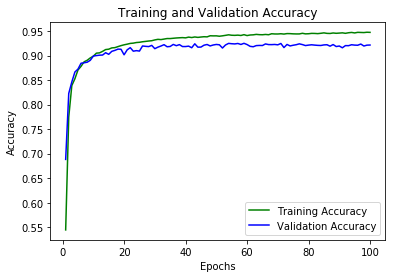

In [129]:
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [130]:
# That wasn't too bad.  Over 80% accuracy.  Let's look at the confusion
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model1.predict(x_test.reshape(10000, 28*28))
y_pred_test = np.argmax(y_pred, axis=1)

confusion_matrix(y_test, y_pred_test)

array([[ 955,    0,    1,    1,    1,    5,    6,    7,    4,    0],
       [   0, 1104,    7,    4,    3,    1,    2,    1,   13,    0],
       [   4,    9,  931,   14,    3,    3,   13,   11,   42,    2],
       [   2,    1,   16,  907,    1,   25,    0,    6,   38,   14],
       [   3,    3,    3,    1,  877,    4,    9,    8,   17,   57],
       [  13,    1,    0,   16,    2,  780,   14,    5,   55,    6],
       [   9,    2,    5,    0,    6,   19,  908,    2,    7,    0],
       [   1,    6,   17,    8,    3,    3,    0,  957,    6,   27],
       [   4,    7,    9,    5,    7,   29,   10,    4,  890,    9],
       [   6,    3,    1,    9,   19,    7,    0,   19,   21,  924]])

In [131]:
print(classification_report(y_test, y_pred_test))

             precision    recall  f1-score   support

          0       0.96      0.97      0.97       980
          1       0.97      0.97      0.97      1135
          2       0.94      0.90      0.92      1032
          3       0.94      0.90      0.92      1010
          4       0.95      0.89      0.92       982
          5       0.89      0.87      0.88       892
          6       0.94      0.95      0.95       958
          7       0.94      0.93      0.93      1028
          8       0.81      0.91      0.86       974
          9       0.89      0.92      0.90      1009

avg / total       0.92      0.92      0.92     10000



In [137]:
# Two hidden layers.
model2 = models.Sequential()
model2.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

#compile the model
model2.compile(optimizer="rmsprop",
    #optimizer=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [138]:
# now fit the model...
eps = 25
history2 = model2.fit(x_train_part,
                    y_train_part,
                    batch_size=128,
                    verbose=0,
                    epochs=eps,
                    validation_data=(x_train_val, y_train_val))
print("training accuracy: {}".format(history2.history['acc'][-1]))
print("validation accuracy: {}".format(history2.history['val_acc'][-1]))

training accuracy: 0.9547291666666666
validation accuracy: 0.947166666507721


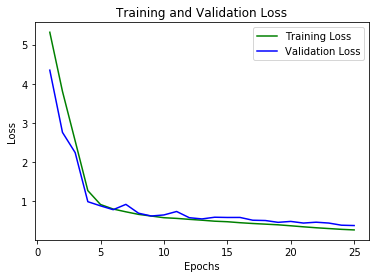

In [139]:
# plot the learning parameters
import matplotlib.pyplot as plt

history_dict = history2.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, eps + 1)

plt.plot(epochs, loss_values, 'g', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

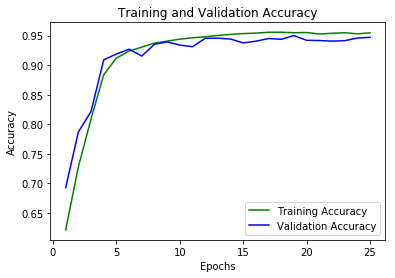

In [140]:
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [141]:
# That wasn't too bad.  Over 80% accuracy.  Let's look at the confusion
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model2.predict(x_test.reshape(10000, 28*28))
y_pred_test = np.argmax(y_pred, axis=1)

confusion_matrix(y_test, y_pred_test)

array([[ 952,    0,    2,    0,    0,    3,    7,    1,    2,   13],
       [   0, 1105,    2,    1,    1,    1,    2,    5,   16,    2],
       [   2,    6,  960,   11,    2,    1,    5,    7,   16,   22],
       [   0,    1,   10,  931,    0,   23,    0,    9,   22,   14],
       [   4,    0,    5,    0,  928,    0,    9,    6,    7,   23],
       [   4,    2,    0,   17,    1,  846,    7,    0,    8,    7],
       [   6,    4,    2,    0,    9,   16,  915,    0,    5,    1],
       [   1,    9,   13,    3,    5,    0,    0,  971,    2,   24],
       [   3,    0,    1,   12,    3,   11,    2,    3,  924,   15],
       [   3,    4,    0,   10,   15,    5,    2,   10,   13,  947]])

In [142]:
print(classification_report(y_test, y_pred_test))

             precision    recall  f1-score   support

          0       0.98      0.97      0.97       980
          1       0.98      0.97      0.98      1135
          2       0.96      0.93      0.95      1032
          3       0.95      0.92      0.93      1010
          4       0.96      0.95      0.95       982
          5       0.93      0.95      0.94       892
          6       0.96      0.96      0.96       958
          7       0.96      0.94      0.95      1028
          8       0.91      0.95      0.93       974
          9       0.89      0.94      0.91      1009

avg / total       0.95      0.95      0.95     10000

